In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.rcParams['figure.figsize'] = [15,7.5]

In [2]:
data = scipy.io.loadmat('./YaleFaceDataBase/Yale_64x64.mat')

In [3]:
X_test = np.array(data['fea'])[150:,:]

In [4]:
X = np.array(data['fea'])[:150,:]

In [5]:
print(X.shape)

(150, 4096)


In [6]:
XtX = X.T.dot(X)

In [7]:
eigValues, eigVectors = np.linalg.eig(XtX)

eigValues = eigValues.flatten()

In [8]:
idx = eigValues.argsort()[::-1]   
eigValues = eigValues[idx]
eigVectors = eigVectors[:,idx]

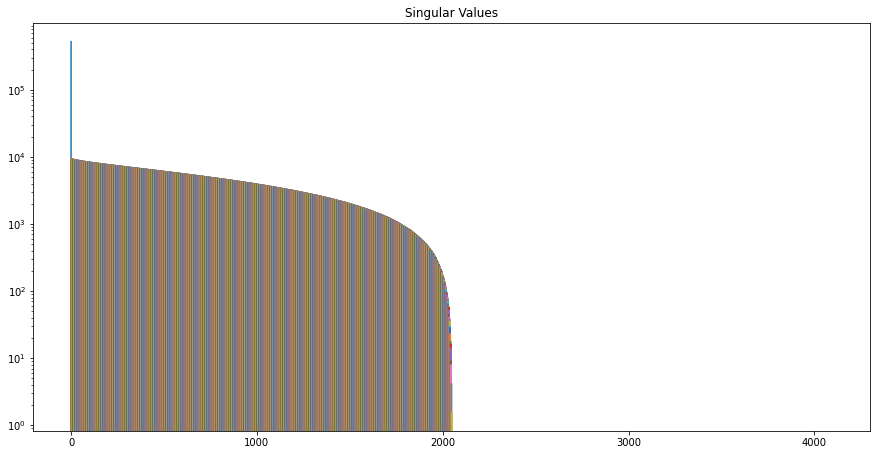

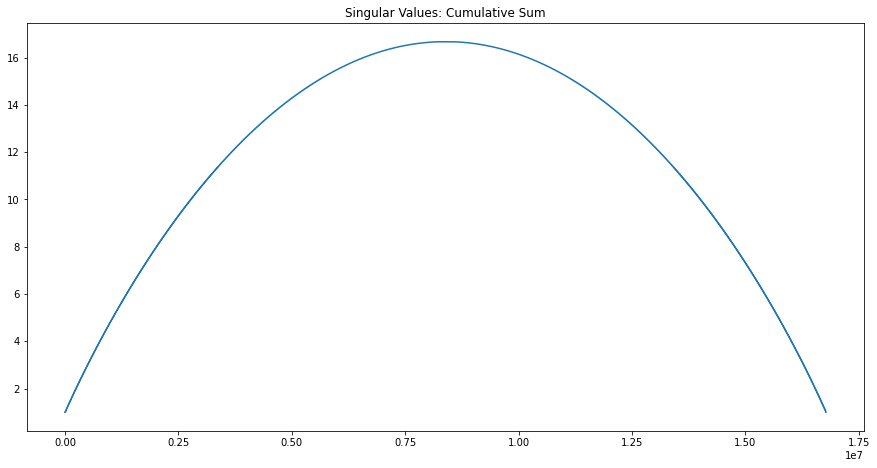

In [9]:
plt.figure(1)
plt.semilogy(np.diag(eigValues))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(eigValues))/np.sum(np.diag(eigValues)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [10]:
r = 0
count = 0
while(r<len(eigValues)):
        if eigValues[r] < 1 and eigValues[r]>-1:
            count += 1    
        r += 1

In [11]:
print(r)
print(count)

4096
0


In [12]:
r = len(eigValues)-count

In [13]:
eigVals = eigValues[:r]
D = np.diag(abs(eigVals)**(1/2))

In [14]:
Vt = eigVectors[:,:r].T

In [15]:
print(Vt.shape)

(4096, 4096)


In [16]:
print(X.shape)

(150, 4096)


# Reconstruction of Training data

In [17]:
Xcap = (X.dot(Vt.T)).dot(Vt)

In [18]:
print(Xcap.shape)

(150, 4096)


[]

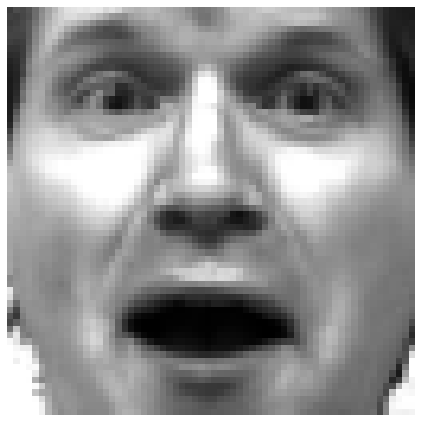

In [19]:
img = plt.imshow(Xcap[1,:].reshape(64,64).T)
img.set_cmap('gray')
plt.axis('off')
plt.plot()

# Reconstruction of Test Data
# xcap = X*V*(Σ^−2)*Vt*Xt*x

In [32]:
invD_sq = np.linalg.inv(np.matmul(D,D))

In [33]:
print(invD_sq)

[[1.91486180e-06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05918417e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.06343809e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.06729331e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.06606541e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.06193786e-04]]


In [35]:
print(X.shape)
print(Vt.T.shape)
print(invD_sq.shape)
print(Vt.shape)
print(X.T.shape)
print(X_test.shape)

(150, 4096)
(4096, 4096)
(4096, 4096)
(4096, 4096)
(4096, 150)
(15, 4096)


In [29]:
UUt = np.matmul(X,np.matmul(Vt.T,np.matmul(np.matmul(invD,invD),np.matmul(Vt,X.T))))

In [ ]:
UUt = np.matmul()

In [24]:
x = X_test
print(x.shape)

(15, 4096)


In [25]:
print(x.shape)

(15, 4096)


In [30]:
print(UUt.shape)

(150, 150)


In [36]:
y = np.matmul(UUt,X)

In [40]:
print(y.shape)

(150, 4096)


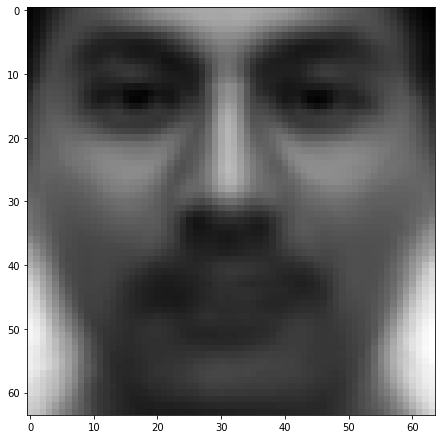

In [42]:
img = plt.imshow(y[19,:].reshape(64,64).T)
img.set_cmap('gray')